# Importing Libraries

In [1]:
import mlflow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initial Analysis

In [2]:
heart = pd.read_csv('..\\data\\raw\\heart.csv')
heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# getting the count values
def value_count():
    print(heart['Sex'].value_counts())
    print('----------------')
    print(heart['ChestPainType'].value_counts())
    print('----------------')
    print(heart['RestingECG'].value_counts())
    print('----------------')
    print(heart['ExerciseAngina'].value_counts())
    print('----------------')
    print(heart['HeartDisease'].value_counts())

value_count()

M    725
F    193
Name: Sex, dtype: int64
----------------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
----------------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
----------------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
----------------
1    508
0    410
Name: HeartDisease, dtype: int64


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

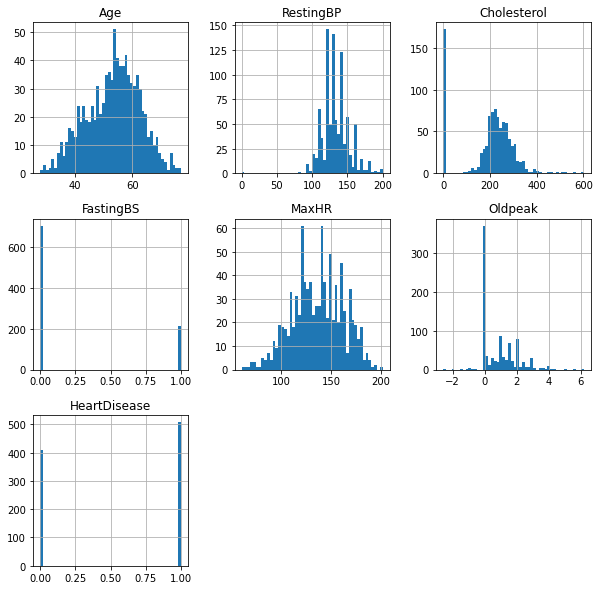

In [6]:
%matplotlib inline
# some histograms for a initial analisys
heart.hist(bins=50, figsize=(10,10))

In [7]:
heart.corr()

C:\Users\clara\AppData\Local\Temp\ipykernel_30740\1516287138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heart.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# Data Analysis

In [8]:
miss_values = (heart.isnull().sum())
print(f'{miss_values} fault values')

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64 fault values


In [9]:
# function to use distribuition graph
def distplot(data_column):
    graph = sns.distplot(data_column,hist=True,kde=True,hist_kws={'linewidth':3})

def pie_graph(data,title,values):
    labels = data[values].value_counts().index
    values = data[values].value_counts()
    fig = go.Figure(data=(go.Pie(labels=labels,values=values)))
    fig.update_layout(title_text = title)
    fig.show()

C:\Users\clara\AppData\Local\Temp\ipykernel_30740\2489533227.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(data_column,hist=True,kde=True,hist_kws={'linewidth':3})


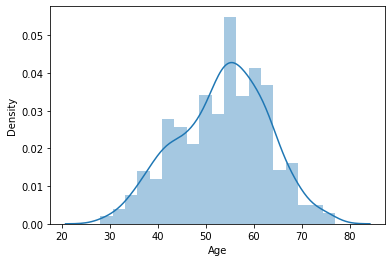

In [10]:
graph = distplot(heart['Age'])

In [11]:
def split_age(age):
    if age < 10:
        return '0-9'
    if  20 >  age >= 10:
        return '10-20'
    if  30>  age >= 20:
        return '20-30'
    if  40 >  age >= 30:
        return '30-40'
    if  50 >  age >= 40:
        return '40-50'
    if  60 >  age >= 50:
        return '50-60'
    if age > 60:
        return '60+'

In [12]:
import plotly.graph_objects as go
import plotly.express as px

heart_cat = pd.DataFrame()
heart_cat['age_cat'] = heart['Age'].apply(split_age)
pie_graph(heart_cat,'Age Distribuition Pie Graph','age_cat')

<AxesSubplot:xlabel='Sex', ylabel='count'>

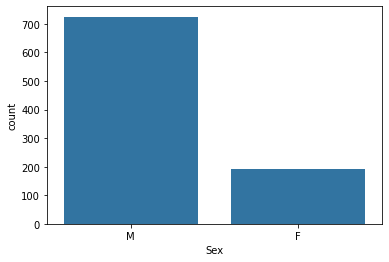

In [13]:
sns.countplot(data=heart,x='Sex')
# the dataset have a desbalanced in gender 

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

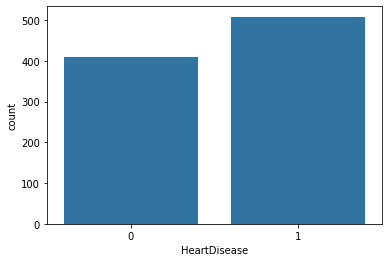

In [14]:
sns.countplot(data=heart,x='HeartDisease')

In [15]:
pie_graph(heart,'Chest Pain Type', 'ChestPainType')

C:\Users\clara\AppData\Local\Temp\ipykernel_30740\2489533227.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




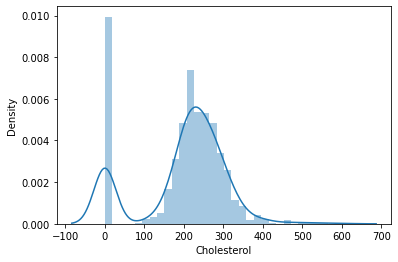

In [16]:
distplot(heart['Cholesterol'])

C:\Users\clara\AppData\Local\Temp\ipykernel_30740\2489533227.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




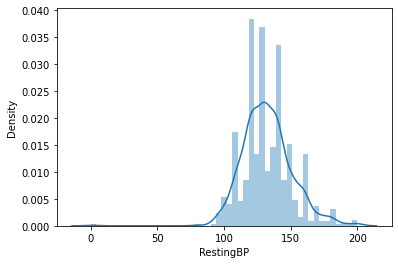

In [17]:
distplot(heart['RestingBP'])

C:\Users\clara\AppData\Local\Temp\ipykernel_30740\2489533227.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




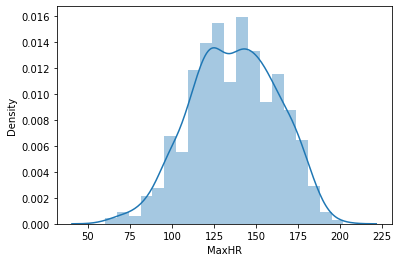

In [18]:
distplot(heart['MaxHR'])

In [19]:
MEAN = heart.Cholesterol.mean()

In [20]:
def input_by_mean(Cholesterol):
       if Cholesterol == 0:
            return MEAN
       else:
            return Cholesterol

In [21]:
heart['Cholesterol'] = heart['Cholesterol'].apply(input_by_mean)

C:\Users\clara\AppData\Local\Temp\ipykernel_30740\3119168326.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

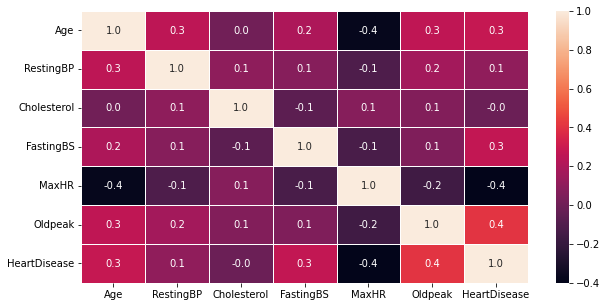

In [22]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(heart.corr(), annot=True,linewidths=.5,fmt='.1f', ax=ax)

# Training Algorithm

In [23]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = heart.drop('HeartDisease', axis=1)
y = heart['HeartDisease'].copy()

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [29]:
def Build_Model(model, categorical_columns, numerical_columns):
    cat_pipeline = OneHotEncoder(handle_unknown='ignore')
    numerical_pipeline = StandardScaler()
    column_transform = ColumnTransformer([('categorical_pipeline', cat_pipeline, categorical_columns ), ('numerical_pipeline', numerical_pipeline, numerical_columns)])
    return Pipeline([('ColumnTransformer', column_transform), ('classifier', model)])

In [30]:
mlflow.sklearn.autolog()

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
model = GaussianNB()
model = Build_Model(model, categorical_columns, numerical_columns)
model

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('numerical_pipeline',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak'])])),
                ('classifier', GaussianNB())])

In [33]:
model.fit(X_train,y_train)

2024/04/18 22:49:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f5684604994f485c92ca4b39fc6cda46', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/04/18 22:49:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\clara\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Inte

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('numerical_pipeline',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak'])])),
                ('classifier', GaussianNB())])

In [34]:
y_pred = model.predict(X_test)

2024/04/18 22:49:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\clara\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
mac = f1_score(y_test, y_pred)

print(acc, prec, rec, mac)


0.842391304347826 0.9239130434782609 0.794392523364486 0.8542713567839195


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier(max_depth=10)
model = Build_Model(model, categorical_columns, numerical_columns)
model

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('numerical_pipeline',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak'])])),
                ('classifier', RandomForestClassifier(max_depth=10))])

In [39]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

2024/04/18 22:49:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f848b60d80a647bfa96cbe7a2787d31c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/04/18 22:49:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\clara\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Inte

In [40]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
mac = f1_score(y_test, y_pred)

print(acc, prec, rec, mac)

0.8641304347826086 0.8942307692307693 0.8691588785046729 0.881516587677725


In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
model = MLPClassifier(max_iter=1000)
model = Build_Model(model, categorical_columns, numerical_columns)
model

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('numerical_pipeline',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak'])])),
                ('classifier', MLPClassifier(max_iter=1000))])

In [43]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

2024/04/18 22:50:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'caea07d5a331422abc01ab176a558da7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2024/04/18 22:50:31 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\clara\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
c:\Users\clara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: C

In [44]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
mac = f1_score(y_test, y_pred)

print(acc, prec, rec, mac)

0.8532608695652174 0.9 0.8411214953271028 0.8695652173913043
